## Overview ##

1. Pengenalan Scikit Learn
1. Instalasi
1. Regresi Linier
1. Regresi Logistik
1. Support Vector Machine
1. Multi-Layered Perceptron (MLP)

### 1. Pengenalan Scikit Learn ###

Scikit-Learn (SKLearn) adalah library python untuk machine learning yang mendukung supervised dan unsupervised learning. SKLearn merupakan produk dari project **Google Summer of Code project** oleh **David Cournapeau**. 

### 2. Instalasi ###

Instalasi scikit-learn cukup mudah, yaitu cukup dengan menjalankan perintah berikut:

$<code>pip install scikit-learn</code>  

Adapun dengan Python 3, perintahnya adalah:

$<code>pip3 install scikit-learn</code>

### 3. Regresi Linier ###

#### Import library yang diperlukan ####


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics


#### Membaca dataset dengan library Pandas ####

In [82]:
data = pd.read_csv('dataset/oregon.csv')

data.columns =(['luas','jmltt','harga'])
data.drop(['jmltt'], axis=1, inplace=True)

X = data['luas']
y = data['harga']
data.head()

,luas,harga
0,1600,329900
1,2400,369000
2,1416,232000
3,3000,539900
4,1985,299900


Plot datanya dengan matplotlib

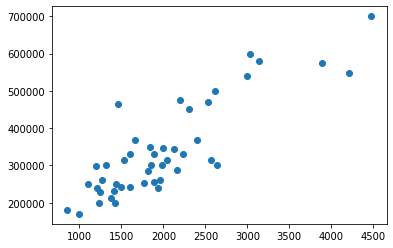

In [83]:
plt.scatter(X.values, y.values)
plt.show()

#### Data Splitting ####

In [84]:
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size =0.2)

#### Model LinearRegression ####

Di scikit-learn terdapat beberapa class untuk machine learning, diantaranya adalah LinearRegression, LogisticRegression, MLPClassifier, dan sebagainya. Di bagian ini, kita akan menggunakan class LinearRegression. Caranya adalah:

In [85]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()  # load class

#### Data Training ####
Data training dengan scikit-learn cukup mudah, hanya dengan memanggil perintah <code>fit</code>, fungsi-fungsi seperti feedforwarding dan backpro sudah berjalan. Berikut adalah kodenya:

In [86]:
lr.fit(x_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

LinearRegression()

#### Prediksi dan Evaluasi Model ####
Di sini, kita akan memprediksi dengan data hasil splitting dan mengevaluasi performanya dengan MSE.

In [87]:
pred_y = lr.predict(x_test.values.reshape(-1,1))
print("Hasil prediksi 5 data teratas {}".format(pred_y[:5]))
print("Data riil 5 data teratas {}".format(y_test[:5]))

mse = lr.score(x_test.values.reshape(-1,1), y_test.values.reshape(-1,1))
print("R2 {}".format(mse))

Hasil prediksi 5 data teratas [[346623.23069795]
 [287904.00550721]
 [336213.91350505]
 [593510.88206811]
 [358900.8868742 ]]
Data riil 5 data teratas 31    314900
0     329900
22    259900
23    573900
36    345000
Name: harga, dtype: int64
R2 0.8172119890950753


Prediksi dengan MSE menunjukkan nilai dari $R^2$ sebesar 0.82. 

### 4. Regresi Logistik ### 

Di regresi logistik, kita akan memprediksi suatu tumor apakah ganas atau jinak dari dataset di [https://www.kaggle.com/uciml/breast-cancer-wisconsin-data](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data).



#### Load dataset ####


In [88]:
import pandas as pd

df = pd.read_csv("dataset/tumor.csv")
df = df.drop('Unnamed: 32', axis=1) # kolom ini dibuang
X = df.drop(['id','diagnosis'],axis=1) # mengambil nilai variabel independen/variabel penentu nilai y/atribut
# X apakah matrix / vektor? matrix

y = df.iloc[:,1] # mengambil nilai variabel dependen/variabel yang ditentukan oleh variabel independennya

# y apakah matriks/vektor? vektor 

#### Normalisasi Data ####

In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

#### Data splitting dan Training ####

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
# library scikit learn / sklearn

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size=0.2) 
# total data 569 data
# test_size = 0.2 artinya dataset dibagi menjadi 20% untuk testing, 80% training

clf = LogisticRegression(max_iter=1000) # max_iter = max epoch = 1000 kali epoch
clf.fit(X_train,y_train) # fit itu berisi training, validation, dan learning rate


LogisticRegression(max_iter=1000)

#### Data Prediksi dan evaluasi performa ####

In [91]:
y_pred = clf.predict(X_test) # prediksi thd test 20%


print("Actual breast cancer : ")
print(y_test.values)

print("\nPredicted breast cancer : ")
print(y_pred)

print("\nAccuracy score : %f" %(accuracy_score(y_test, y_pred) * 100))


Actual breast cancer : 
['B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B'
 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B'
 'M' 'B' 'M' 'M' 'M' 'M']

Predicted breast cancer : 
['B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B'
 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'B' 'M' 'B' 'M' 'M']

Accuracy score : 96



### 5. Support Vector Machine ###

### 6. Multi-Layered Perceptron ###